# **Python for Machine Learning (Diabetes Prediction)**

<a href="https://colab.research.google.com/github/nghiamvt/machine-learning/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

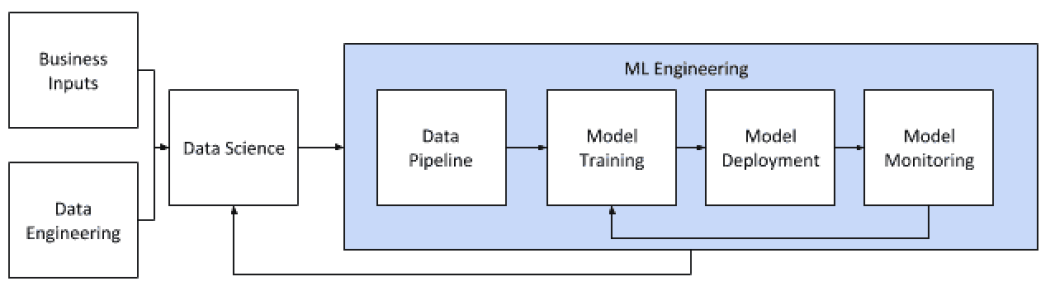

# **Loading in Data**


In [1]:
# install panda package
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# Load data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vasighiz/COMP8967-1-R-2022S-Internship-Project-I/main/diabetes.csv')

In [40]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 9 columns in the dataframe.

0. **Pregnancies** Number of times pregnant.
1. **Glucose** Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. **BloodPressure** Diastolic blood pressure (mm Hg).
3. **SkinThickness** Triceps skinfold thickness (mm).
4. **Insulin** 2-Hour serum insulin (mu U/ml).
5. **BMI** Body mass index (weight in kg/(height in m)^2).
6. **DiabetesPedigreeFunction** Diabetes pedigree function.
7. **Age** Age (years).
8. **Outcome**: Class variable (0 or 1).

# **Data Preprocessing**

## **Check data conversion**

All values are in integer or float format which is good for modeling. Therefore, there are no type conversions needed.

## **Check data missing**

In [41]:
# Checking null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing or null value. 

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are some rows that have value of 0. Let's review the data in each column by describing the dataframe

In [43]:
# describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Except for **DiabetesPedigreeFunctinon**, **Age**, **Outcome**, other columns have a minimum value of 0.

Having zero in **Pregnancies** column makes sense, but having **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI** with zero value means that some data are missing.

Let's check the number of missing information in these columns

In [44]:
x = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] == 0
x = x.sum()
print(x)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


While **Glucose**, **BloodPressure** and **BMI** have a few missing values, **SkinThickness** and **Insulin** are missing a lot of data

## **Handle data missing**

For columns having **Small numbers of missing values**, we will fill missing values with **mean** values

*   **mean** - The average value
*   **median** - The mid point value

In [46]:
# change 0 values to NAN for fewer missing rows
import numpy as np

# Mark as Nan
df[["BloodPressure","Glucose","BMI"]] = df[["BloodPressure","Glucose","BMI"]].replace(0, np.NaN)
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)

In [47]:
# verify data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,20.536458,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,15.952218,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, **Glucose**, **BloodPressure** and **BMI** no longer have 0 minimum values.

With the columns (**Insulin** and **SkinThickness**) having **high numbers of missing values**, we have 3 ways:

1.   Remove these rows from the data
2.   Ignore these columns during modelling.
3.   Fill the missing values with some logic


In this case, we will fill them with median values

In [53]:
df[["SkinThickness","Insulin"]] = df[["SkinThickness","Insulin"]].replace(0, np.NaN)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)

In [54]:
# verify data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
# Split data to features and lable
X2 = df.iloc[:,0:-1] # features
y2 = df.iloc[:,-1]   # label

print(X2.head(),'\n')
print('labels:\n',y2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

labels:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


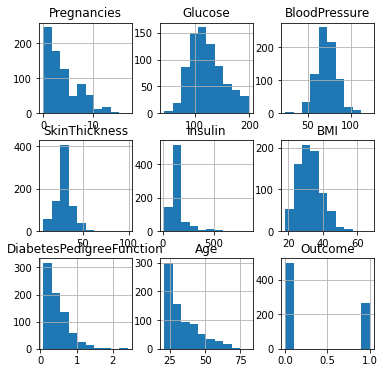

In [56]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (6,6))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [57]:
from sklearn import preprocessing

s = preprocessing.MinMaxScaler()
s.fit(X2)
X_norm2 = s.transform(X2)

# X = preprocessing.normalize(X, norm='l2')

print(type(X_norm2))

<class 'numpy.ndarray'>


In [58]:
print('Before Normalization')
print(X2.head(),'\n')
print('After Normalization')
print((pd.DataFrame(X_norm2)).head())

Before Normalization
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

After Normalization
          0         1         2         3         4         5         6  \
0  0.352941  0.670968  0.489796  0.304348  0.133413  0.314928  0.234415   
1  0.058824  0.264516  0.428571  0.239130  0.133413  0.171779  0.116567   
2  0.470588  0.896774  0.408163  0.239130  0.133413  0.104294  0.253629   
3  0.058824  0

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision', 'recall', 'accuracy']
clf2 = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
scores2 = cross_validate(clf2, X_norm2, y2,cv=5, scoring=scoring)

prec2 = np.mean(scores2['test_precision'])
rec2 = np.mean(scores2['test_recall'])
acc2 = np.mean(scores2['test_accuracy'])

print('Average precision is:' , prec2)
print('Average recall is:' , rec2)
print('Average accuracy is:' , acc2)

Average precision is: 0.7193059130949091
Average recall is: 0.5227812718378756
Average accuracy is: 0.7617774382480265


# **Precision-Recall curve**
Precision-recall curves are typically used in binary classification to study the output of a classifier. 

Average Precision and the area under the curve (sklearn.metrics.auc) are common ways to summarize a precision-recall curve.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve')

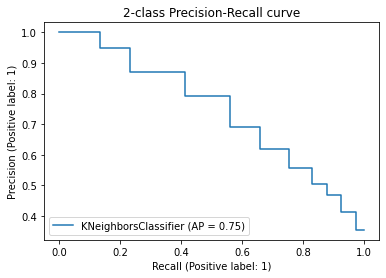

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(
    X_norm2, y2, test_size=0.3, random_state=None)
clf2.fit(X_train, y_train)
disp = plot_precision_recall_curve(clf2, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

# **Multicalss classification in Scikit-learn (Decision Tree)**


## **1-Data visualization**

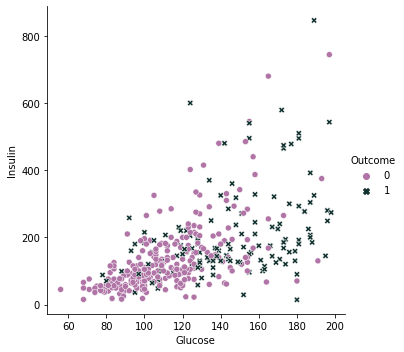

In [26]:
import seaborn as sns
sns.relplot(x="Glucose", y="Insulin",  hue='Outcome', style='Outcome', palette="ch:2,r=.9,l=.55", data=df);

## **2- Slice data into features and labels**

In [61]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
print("Shape of X is: ",X.shape)
print(X.head())

Shape of X is:  (768, 8)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


## **3- Split data into train set and validation set**

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None)
print("The number of train samples are:", X_train.shape[0])
print("The number of test samples are:", X_test.shape[0])

The number of train samples are: 537
The number of test samples are: 231


## **4 -Learn a Decision Tree model**

Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

For more study:

[Decision tree in Scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

In [64]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dtModel = dt.fit(X_train, y_train)

#### **Plot trained tree**
The decision tree structure can be analysed to gain further insight on the relation between the features and the target to predict.

The most important step in parameter setting is to define and prioritize feature based on their ability to split samples. Then, use these features from root to leafs to predict target label for samples.

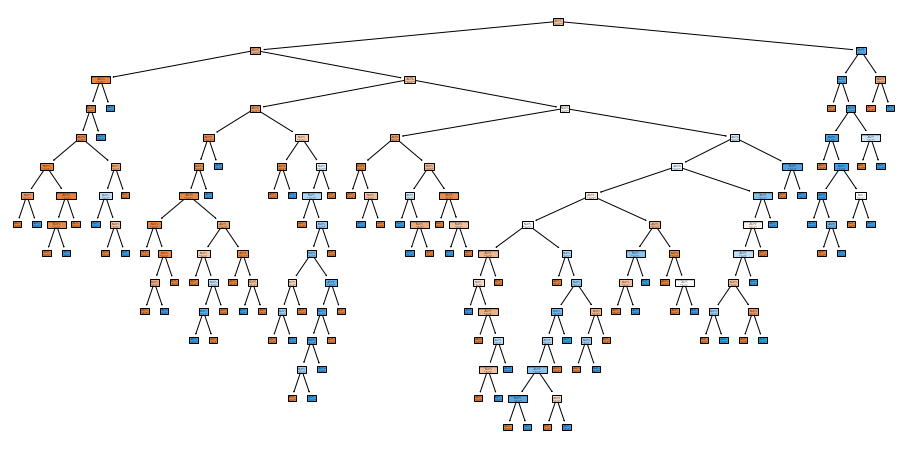

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
tree.plot_tree(dtModel,
               feature_names=X.columns,  
               class_names='Outcome',  
               filled=True)
plt.show()

## **5- Classification performance measurment**

### [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
Evaluation of trained model



####Multi-class confusion matrix

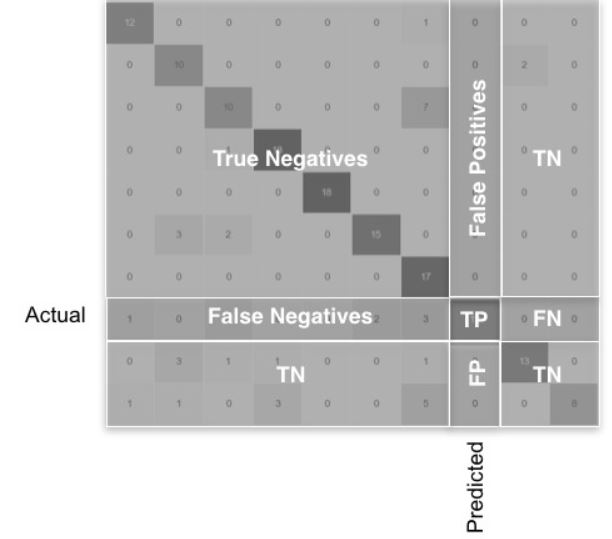



In [66]:
from sklearn.metrics import confusion_matrix

y_pred = dtModel.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[105,  42],
       [ 42,  42]])

#### Plot confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


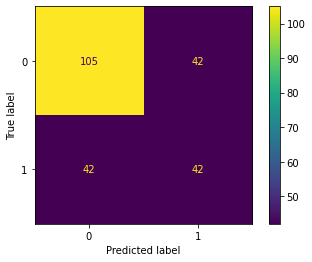

In [67]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

plot_confusion_matrix(dtModel, X_test, y_test)  
plt.show()

####Multiclass classification performance

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

[Performance metrics in skleran](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


In [68]:
from sklearn import metrics

y_pred = dtModel.predict(X_test)

precision = metrics.precision_score(y_test, y_pred, average='macro') # average='micro','weighted', None
recall = metrics.recall_score(y_test, y_pred, average='macro')

print('Precision is: %.2f' %precision)
print('Recall is: %.2f' %recall)

Precision is: 0.61
Recall is: 0.61
